In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

/Users/kishan/Desktop/python/env/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df=pd.read_csv('Transactions.csv')

In [5]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [8]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price]
Index: []


In [9]:
df.shape

(1000, 7)

In [10]:
df['CustomerID'].value_counts()

CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
         ..
C0058     1
C0014     1
C0151     1
C0078     1
C0110     1
Name: count, Length: 199, dtype: int64

In [13]:
df['CustomerID'].nunique()

199

In [14]:
df['ProductID'].nunique()

100

In [17]:
# Convert 'TransactionDate' to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Year'] = df['TransactionDate'].dt.year
tpy = df['Year'].value_counts()

# Display the result
print("Transactions per year:")
print(tpy)


Transactions per year:
Year
2024    996
2023      4
Name: count, dtype: int64


In [20]:
#tpm for 2024 
df_2024 = df[df['TransactionDate'].dt.year == 2024]
df_2024['Month'] = df_2024['TransactionDate'].dt.month
tpm_2024 = df_2024['Month'].value_counts().sort_index()
print(tpm_2024)

Month
1     107
2      77
3      80
4      86
5      86
6      69
7      96
8      94
9      96
10     70
11     57
12     78
Name: count, dtype: int64


/var/folders/5g/_kblnvd93wz4nr8svk5h7qhh0000gn/T/ipykernel_22013/3288117411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Month'] = df_2024['TransactionDate'].dt.month


In [19]:
#tpm for 2023
df_2023 = df[df['TransactionDate'].dt.year == 2023]
df_2023['Month'] = df_2023['TransactionDate'].dt.month
tpm_2023 = df_2023['Month'].value_counts().sort_index()
print(tpm_2023)

Month
12    4
Name: count, dtype: int64


/var/folders/5g/_kblnvd93wz4nr8svk5h7qhh0000gn/T/ipykernel_22013/925380261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Month'] = df_2023['TransactionDate'].dt.month


In [ ]:
# Consistent Transaction Volume
# with quater 3 (July to sep in 2024 ) being high volume and last quater comparatively the slowest 

/var/folders/5g/_kblnvd93wz4nr8svk5h7qhh0000gn/T/ipykernel_22013/248397643.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Month'] = df_2024['TransactionDate'].dt.month
/var/folders/5g/_kblnvd93wz4nr8svk5h7qhh0000gn/T/ipykernel_22013/248397643.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tpm_2024.index, y=tpm_2024.values, palette='viridis')


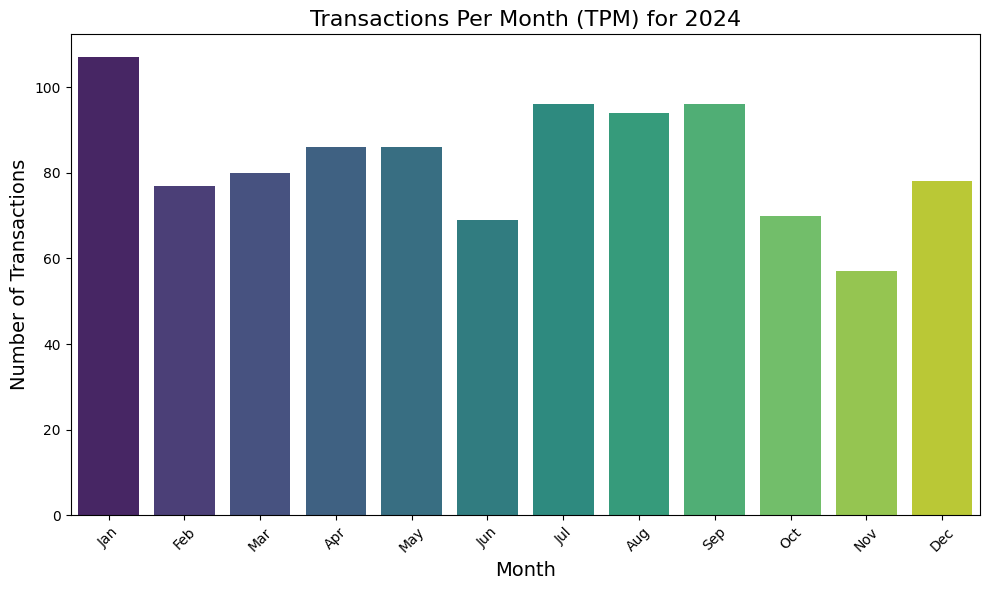

In [21]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


df_2024 = df[df['TransactionDate'].dt.year == 2024]

df_2024['Month'] = df_2024['TransactionDate'].dt.month
tpm_2024 = df_2024['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=tpm_2024.index, y=tpm_2024.values, palette='viridis')
plt.title('Transactions Per Month (TPM) for 2024', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.tight_layout()
plt.show()
